SciPy - One-dimensional nearest  I nterpolation (scipy.interpolate.interp1d  kind='nearest') 

* https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html

* https://docs.scipy.org/doc/scipy/reference/tutorial/interpolate.html

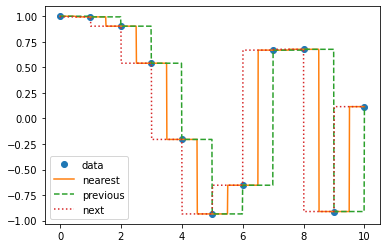

In [2]:
import numpy as np
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f1 = interp1d(x, y, kind='nearest')
f2 = interp1d(x, y, kind='previous')
f3 = interp1d(x, y, kind='next')

xnew = np.linspace(0, 10, num=1001, endpoint=True)
import matplotlib.pyplot as plt
plt.plot(x, y, 'o')
plt.plot(xnew, f1(xnew), '-', xnew, f2(xnew), '--', xnew, f3(xnew), ':')
plt.legend(['data', 'nearest', 'previous', 'next'], loc='best')
plt.show()

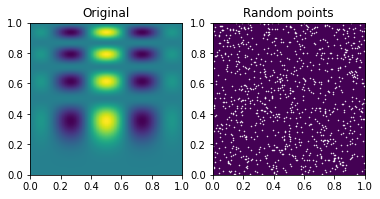

In [45]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

import matplotlib.pyplot as plt

def  cons(x, y):
    return np.ones_like(x) * np.ones_like(y)

    
plt.subplot(121)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.title('Original')
plt.subplot(122)
plt.imshow(cons(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'w.', ms=1)
plt.title('Random points')

plt.gcf().set_size_inches(6, 6)
plt.show()


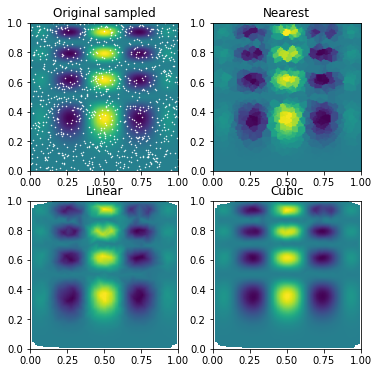

In [46]:
import matplotlib.pyplot as plt

plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'w.', ms=1)
plt.title('Original sampled')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()